In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [3]:
DF = pd.read_csv('Fever-1.csv')

In [4]:
DF.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [5]:
DF.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [7]:
DF.A=pd.Categorical(DF.A)
DF.B=pd.Categorical(DF.B)

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: category(2), float64(1), int64(1)
memory usage: 984.0 bytes


In [10]:
formula = 'Relief ~ C(A)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [11]:
formula = 'Relief ~ C(B)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


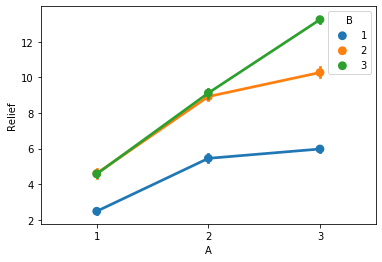

In [18]:
sns.pointplot(x='A', y='Relief', data=DF, hue='B')

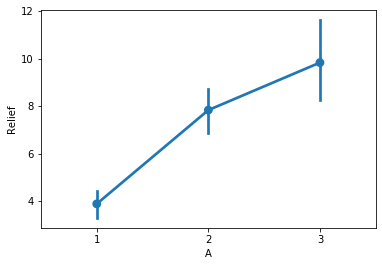

In [13]:
sns.pointplot(x='A', y='Relief', data=DF)

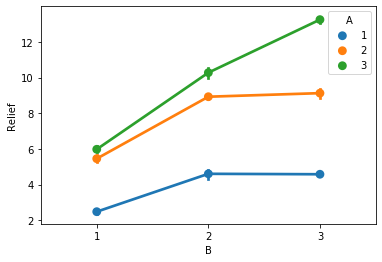

In [17]:
sns.pointplot(x='B', y='Relief', data=DF, hue='A')

In [19]:
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [20]:
formula = 'Relief ~ C(A) + C(B) + Volunteer + C(A):C(B)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

             df      sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020000  110.010000  1760.400739  1.765119e-28
C(B)        2.0  123.660000   61.830000   989.415305  2.935240e-25
C(A):C(B)   4.0   29.425000    7.356250   117.716098  2.938033e-16
Volunteer   1.0    0.000222    0.000222     0.003556  9.529043e-01
Residual   26.0    1.624778    0.062491          NaN           NaN
